In [2]:
%matplotlib notebook
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [27]:
sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Mar  9 2019 15:06:42
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0012246196513226696 y=0.007528875304464409 z=-4.529766384857568e-05 vx=-0.002977509060539432 vy=0.0005196272260244045 vz=7.716255120345911e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.041258932999459125 y=0.3143342414090862 z=0.028697467456984704 vx=-12.254319160571612 vy=-0.9553420041882094 vz=1.0458785453484094>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.42146563703371775 y=-0.5822813543687417 z=0.016112894679529973 vx=5.962294718483822 vy=-4.320328498402832 vz=-0.403452133194268>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.9283011176696948 y=0.3564081321895419 z=-5.846429717789078e-05 vx=-2.3186436741180527 vy=-5.904385726074369 vz=0.0003515866

In [ ]:
sim.move_to_com()
sim.integrate(8630)
sim.save("year_8630.bin")

In [28]:
sim.move_to_com()
sim.integrate(200)
sim.save("year_200.bin")

In [34]:
sim = rebound.Simulation.from_file("year_200.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Mar  9 2019 15:06:42
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	2.0000000000000000e+02
Current timestep:    	0.004606
---------------------------------
<rebound.Particle object, m=1.0 x=0.007152244041293115 y=0.0022561195427191474 z=-0.00020054300086715996 vx=-0.0013032666897079214 vy=0.002814067539133822 vz=1.817423631265956e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.20326638766345131 y=-0.40965992222759856 z=-0.01477285393148104 vx=7.077806367124216 vy=-4.184668755831787 vz=-0.9890189826870368>
<rebound.Particle object, m=2.4478382877847715e-06 x=0.005506198065323594 y=-0.7245683448293682 z=-0.010479465508834187 vx=7.3376220991396925 vy=-0.04059880525845311 vz=-0.4228572152252779>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.9113796810691104 y=0.37202500598596466 z=-0.0003377433257659965 vx=-2.449482682610465 vy=-5.851032816841818 vz=0.003050

In [3]:
sim = rebound.Simulation.from_file("year_8630.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Mar  9 2019 15:06:42
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	8.6300000000000000e+03
Current timestep:    	0.002141
---------------------------------
<rebound.Particle object, m=1.0 x=0.00036775374125587977 y=-0.0025755146666507525 z=6.996591313382002e-05 vx=0.002149519107624452 vy=-3.0381837544962908e-05 vz=-3.650018199387814e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=0.18776198766604388 y=0.2534132773091936 z=0.01070400975125577 vx=-10.432789992800656 vy=6.0216640289295835 vz=1.2649553447355848>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.339890040062739 y=-0.6425478315184134 z=-0.007133442897131516 vx=6.493488463034742 vy=-3.4727186297476336 vz=-0.3906141911566087>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.21807696685329556 y=0.9621880571341614 z=-0.013963030415934361 vx=-6.183372081038461 vy=-1.4376481158740673 vz=0.0720508089

In [4]:
print(sim.t)

8630.0


In [5]:
def rotate(theta, index):
    x_ = sim.particles[index].x * np.cos(theta) - sim.particles[index].y* np.sin(theta)
    y_ = sim.particles[index].x * np.sin(theta) + sim.particles[index].y* np.cos(theta)
    return x_ , y_
    
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
print(sim.t)
sim.t = 8630
print(sim.t)
sim.move_to_com()
Noutputs = 5000
years = 5.
#position in co-rotating frame
sun_pos = np.zeros((Noutputs,2))
earth_pos = np.zeros((Noutputs,2))
cruithne_pos = np.zeros((Noutputs,2))
times = np.zeros(Noutputs)
i = 0

x_earth = sim.particles[2].x
y_earth = sim.particles[2].y
z_earth = sim.particles[2].z
pos = (sim.particles[2].x, sim.particles[2].y)
theta = 0
for time in np.linspace(0,years,Noutputs):
    #print(time)

    sim.integrate(8630+time)

    new_x_earth = sim.particles[2].x
    new_y_earth = sim.particles[2].y
    new_z_earth = sim.particles[2].z
    new_pos = (sim.particles[2].x, sim.particles[2].y)
    
    #theta = 2*np.arcsin( (np.sqrt((new_x_earth-x_earth)**2 + (new_y_earth-y_earth)**2)/2 ) \
                        #/np.sqrt(new_x_earth**2 + new_y_earth**2))    
    

    theta -= angle_between(pos,new_pos)    
    #print(theta)
    angle = theta % (2*np.pi)
    earth_pos[i] = rotate(angle, 2)
    sun_pos[i] =  rotate(angle, 0)
    cruithne_pos[i] = rotate(angle, 5)

    x_earth = new_x_earth
    y_earth = new_y_earth
    z_earth = new_z_earth
    pos = new_pos
    #energy_deltas[i] = sim.calculate_energy()- energy_0
    times[i] = time
    i += 1
#print(sun_pos)
#print(earth_pos)
#print(cruithne_pos)


8630.0
8630.0


<IPython.core.display.Javascript object>


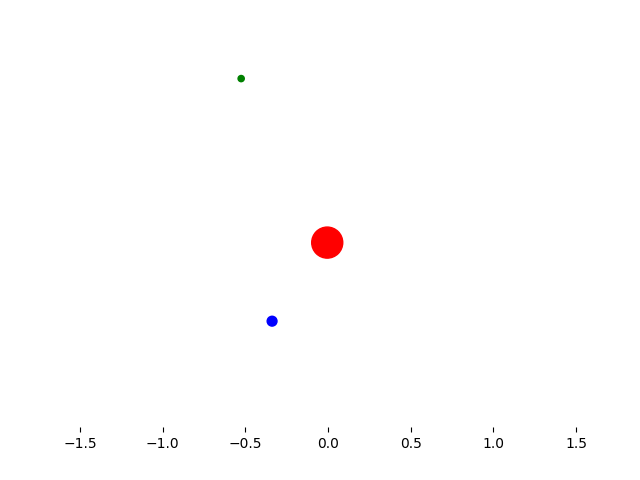

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)


x_pos = [earth_pos[0,0],sun_pos[0,0],cruithne_pos[0,0]]
y_pos = [earth_pos[0,1],sun_pos[0,1],cruithne_pos[0,1]]
line_x = []
line_y = []
scat = ax.scatter(x_pos,  \
                  y_pos,   \
                  c=['b','r','g'], marker="o", s=[50,500,20])
line, = ax.plot(line_x,line_y)
time = ax.text(0,1.3,"time")

def update(frame):
    
    x_pos = [earth_pos[frame,0],sun_pos[frame,0],cruithne_pos[frame,0]]
    y_pos = [earth_pos[frame,1],sun_pos[frame,1],cruithne_pos[frame,1]]
    scat.set_offsets(np.c_[x_pos,y_pos])
    
    line_x.append(cruithne_pos[frame,0])
    line_y.append(cruithne_pos[frame,1])
    line.set_data(line_x,line_y)
    
    
    time_left = (1860-frame)*0.001
    time.set_text(str(time_left)+ " years time before collisions.")
    return scat, line,


ani = animation.FuncAnimation(fig, update, blit=True,interval=1)
plt.show()

<IPython.core.display.Javascript object>


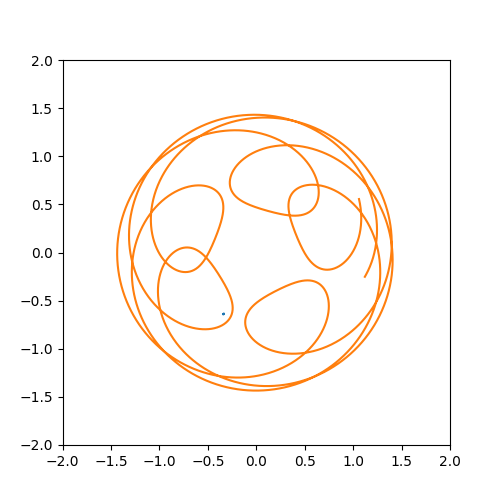

In [10]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(earth_pos[:,0],earth_pos[:,1]);
plt.plot(cruithne_pos[:,0],cruithne_pos[:,1]);